Dimensionaliy reduction 차원 축소 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

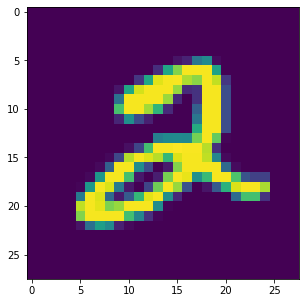

label : 2


In [16]:
plt.figure(figsize=(5,5))
idx = 5

grid_data = X.loc[idx,:].to_numpy().reshape(28,28)  
plt.imshow(grid_data, interpolation = "none")
plt.show()

print('label : {}'.format(y[idx]))

<Figure size 432x288 with 0 Axes>

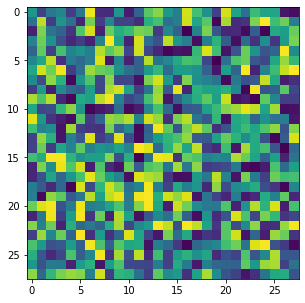

In [15]:
plt.clf()
plt.figure(figsize=(5,5))

rand_img = np.random.rand(28,28)
plt.imshow(rand_img)
plt.show()

In [25]:
labels=y[:15000]
data = X[:15000]
print(data) #data는 784차원이다
print(data.shape)

       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
14995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
14996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
14997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
14998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
14999     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0

[15

In [20]:
#Normalization 과정
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)
sample_data = standardized_data

(15000, 784)


In [21]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample_data) #PCA로 2차원으로 줄인 것이다.
print(pca_data)

[[-0.9607681  -4.4568467 ]
 [ 8.658151   -7.397755  ]
 [ 2.082912    9.640221  ]
 ...
 [-5.753108    1.1255832 ]
 [-7.3942156  -0.02643041]
 [-5.4771466   1.8320667 ]]


In [22]:
#vstack으로 열 붙이기
pca_data=np.vstack((pca_data.T, labels)).T
print(pca_data)

[[-0.9607681  -4.45684671  5.        ]
 [ 8.65815067 -7.39775515  0.        ]
 [ 2.08291197  9.64022064  4.        ]
 ...
 [-5.75310802  1.12558317  7.        ]
 [-7.39421558 -0.02643041  1.        ]
 [-5.47714663  1.83206666  7.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


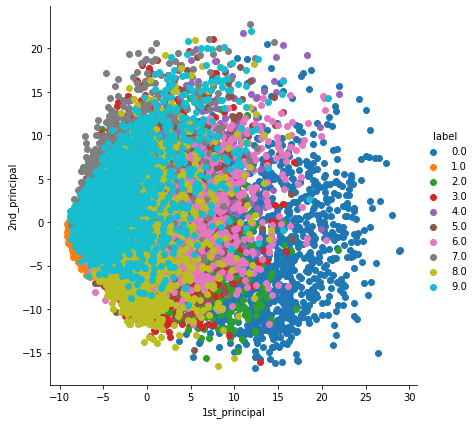

In [24]:
#PCA data 시각화
import seaborn as sn
pca_df=pd.DataFrame(data=pca_data, columns=("1st_principal",
                                            "2nd_principal","label"))
##PC1, PC2
sn.FacetGrid(pca_df, hue='label', size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

직접 PCA를 짠 경우,
eigen value와 egien vector를 구해야함
=> 공분산 행렬을 먼저 구해야함
곤분산 행렬: E(X*X_T)

In [36]:
#egien value와 eigen vector를 구하기 위해
#공분산 matrix 먼저 구함
print(sample_data)
covar_matrix=np.matmul(sample_data.T, sample_data)
print('The shape of variance matrix=',covar_matrix.shape)
print(sample_data.mean())
print(covar_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The shape of variance matrix= (784, 784)
7.635882e-10
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
# finding the top two eigen-values and corresponding eigen-vectors 
#2차원의 eigen vector를 구하는 과정,

from scipy.linalg import eigh 

#maximum eigenvalue를 구하기 위해? 하는 것?

# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(vectors)
print(values)
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
print(vectors)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[459916.4  616509.44]
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print(new_coordinates)
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

[[-4.4570503  -7.3977933   9.640693   ...  1.1252745  -0.02666903
   1.831721  ]
 [ 0.96076924 -8.658155   -2.082853   ...  5.7530985   7.3942046
   5.4771333 ]]
 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)
